# 1. Importing libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

# 2. Gathering Data

A.Importing Enhanced Twitter Archive

In [13]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

B. Download The Tweet Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv' , mode ='wb') as file:
    file.write(response.content)

C.Getting Tweet Data From  Twitter API.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        break

<class 'str'>
<class 'dict'>


In [8]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet ['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list)
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
print(df_list[0])

{'tweet_id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467}


In [6]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet ['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count,
                       'user_count': user_count})
tweet_data  = pd.DataFrame(df_list) 
tweet_data .sample(10)

,tweet_id,retweet_count,favorite_count,user_count
2172,669216679721873412,422,958,3201012
1897,674670581682434048,729,1751,3201004
1226,713900603437621249,829,3062,3200947
1961,673352124999274496,597,1761,3201004
1172,720059472081784833,1268,4229,3200945
618,796149749086875649,16628,36177,3200900
279,839549326359670784,8805,29957,3200891
1235,712309440758808576,26,269,3200947
1042,743609206067040256,1560,4917,3200943
2221,668297328638447616,319,656,3201015


In [10]:
tweet_data .to_csv('tweet_data.csv', index=False)

In [25]:
x = pd.read_csv('tweet_data.csv')
x.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


# 3.Assessing Data

A.Assesing Enhanced Twitter Archive Data

In [14]:
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1440,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None


In [16]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [18]:
t_archive[t_archive.rating_numerator <10 ].count()[0]

440

In [19]:
t_archive[t_archive.rating_numerator <10 ].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [20]:
t_archive.loc[(t_archive.tweet_id == 666337882303524864) , 'rating_numerator']

2333    9
Name: rating_numerator, dtype: int64

In [21]:
t_archive.loc[2333, 'text']

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [22]:
t_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [23]:
t_archive[t_archive.rating_denominator == 0 ].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [24]:
t_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [25]:
t_archive[t_archive.rating_denominator != 10 ].count()[0]

23

In [26]:
t_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
              ... 
Shakespeare      1
Taco             1
Barney           1
Coopson          1
Nugget           1
Name: name, Length: 957, dtype: int64

B.Assesing The Tweet Image Predictions

In [27]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t' )
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1249,747844099428986880,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,1,Pembroke,0.360428,True,papillon,0.263134,True,Chihuahua,0.131246,True
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,Labrador_retriever,0.884839,True,Chesapeake_Bay_retriever,0.057565,True,paintbrush,0.005766,False
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,borzoi,0.564688,True,ice_bear,0.078267,False,Pembroke,0.057916,True
1776,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,American_Staffordshire_terrier,0.523086,True,Staffordshire_bullterrier,0.186168,True,Chihuahua,0.042089,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador_retriever,0.627856,True,German_short-haired_pointer,0.173675,True,Chesapeake_Bay_retriever,0.041342,True


In [29]:
image_predictions.loc[1312, 'jpg_url'] #identified as bathtup.

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [30]:
from IPython.display import Image
Image(url ='https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')

In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


C.Assesing The Tweet Tata Trom Twitter API

In [32]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
1199,716447146686459905,6643,14327
1445,696488710901260288,1166,2788
1516,690932576555528194,1143,3602
1259,710153181850935296,1006,3153
113,870656317836468226,2817,12819
2204,668631377374486528,349,763
1021,746521445350707200,1110,0
451,818614493328580609,2982,10971
1494,692530551048294401,474,2021
1567,687807801670897665,801,2625


In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Tidiness

T1. For dog stage, there are some rows with multiple dog stages.

T2. all data is related but divided into 3 separate dataframes.


 # Quality

A) Enhanced Twitter Archive

1.there are 181 retweets as indicated by retweeted status_id.

2.Name column have None instead of NaN and too many unvalid values.

3.invalid tweet_id data type(integer instead of string).

4.invalid timestamp data type(string not datetine).

5.440 rating numerators less than 10 .

6.raw 313 has no denominators.

7.23 rating denominators no equal 10.

B) Tweet Image Predictions.

1.underscores are used in multi-world names in columns p1,p2&p3 instead of spaces.

2 some P names started with an uppercase letter while other started with lowercase

c) Tweet Data From Twitter Api

1.missing entires (only 2354 entires instead of 2356)


# 4.Cleaning Data

A. creating dataframe copies

In [35]:
clean_t_archive = t_archive.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [36]:
clean_t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [37]:
clean_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [52]:
clean_tweet_data.head(1)

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889


B.Cleaning Tidiness Issues.

T1. For dog stage, there are some rows with multiple dog stages

 Define

 
 clean data from some rows with multiple dog stages.

code

In [38]:
# handle none
clean_t_archive.doggo.replace('None', '', inplace=True)
clean_t_archive.floofer.replace('None', '', inplace=True)
clean_t_archive.pupper.replace('None', '', inplace=True)
clean_t_archive.puppo.replace('None', '', inplace=True)

In [39]:
# merge into column
clean_t_archive['dog_stage'] = clean_t_archive.doggo + clean_t_archive.floofer + clean_t_archive.pupper 

In [40]:
# handle multiple stages
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_t_archive.loc[clean_t_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [41]:
# handle missing values
clean_t_archive.loc[clean_t_archive.dog_stage == '', 'dog_stage'] = np.nan

In [57]:
clean_t_archive.dog_stage.value_counts(dropna = False)

NaN               2005
pupper             245
doggo               84
doggo, pupper       12
floofer              9
doggo, floofer       1
Name: dog_stage, dtype: int64

test

In [42]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

T2. All data is related but divided into 3 separate dataframes.

Define

Merge all dataframes into 1 based on tweet_id

code

In [43]:
clean_t_archive = pd.merge(clean_t_archive, clean_tweet_data, on= 'tweet_id', how= 'left')
clean_t_archive = pd.merge(clean_t_archive, clean_image_predictions, on= 'tweet_id', how= 'left')

test

In [44]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

C.Cleaning Quality Issues.

AQ1.There are 181 retweets as indicated by retweeted status_id.

Define

Delete rows that represent retweets and all the relatted columns.

code

In [45]:
clean_t_archive = clean_t_archive[clean_t_archive.retweeted_status_id.isnull()]
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [46]:
clean_t_archive = clean_t_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

test

In [47]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  dog_stage              320 non-null    object 
 15  retw

AQ2.Name column have None instead of NaN and too many unvalid values.

Define

Replace 'None' with np.name in t_archive name column.

Remove any rows with invalid names which starts with lower letter.

code

In [48]:
clean_t_archive[~clean_t_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [49]:
clean_t_archive.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

test

In [50]:
clean_t_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [254]:
clean_t_archive.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Koda           6
Bella          6
Stanley        6
Oscar          6
Bo             6
Jax            6
Bailey         6
Milo           5
Leo            5
Rusty          5
Bentley        5
Chester        5
Dave           5
Buddy          5
Louis          5
Scout          5
Bear           4
Finn           4
Dexter         4
              ..
Kollin         1
Hanz           1
Miguel         1
Brandy         1
Cermet         1
Gilbert        1
Oddie          1
Georgie        1
Lilli          1
Banjo          1
Christoper     1
Pipsy          1
Ron            1
Mauve          1
Ben            1
Siba           1
Lilah          1
Joey           1
DonDon         1
Karma          1
Norman         1
Karll          1
Strider        1
Pip            1
Philippe       1
Dot            1
Carly          1
Rey           

In [51]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1391 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  dog_stage              320 non-null    object 
 15  retw

AQ3. invalid tweet_id data type(integer instead of string).

Define

correct invalid data type by converting tweet_id to string.

code

In [52]:
clean_t_archive.tweet_id = clean_t_archive.tweet_id.astype(str)

test

In [53]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1391 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  dog_stage              320 non-null    object 
 15  retw

AQ4. invalid timestamp data type(string not datetime).

Define

correct invalid data type by converting timestamp to datamine

code

In [54]:
clean_t_archive.timestamp = pd.to_datetime(clean_t_archive.timestamp)

test

In [55]:
clean_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

BQ1.underscores are used in multi-world names in columns p1,p2&p3 instead of spaces.


Define

convert underscores to spaces

code

In [56]:
clean_t_archive.p1 = clean_t_archive.p1.str.replace('_',' ')
clean_t_archive.p2 = clean_t_archive.p2.str.replace('_',' ')
clean_t_archive.p3 = clean_t_archive.p3.str.replace('_',' ')

test

In [57]:
clean_t_archive.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [58]:
clean_t_archive.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [59]:
clean_t_archive.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

BQ.2 some P names started with an uppercase letter while other started with lowercase

Define

convert lowercase letters to uppercase

code

In [60]:
clean_t_archive.p1 = clean_t_archive.p1.str.title()
clean_t_archive.p2 = clean_t_archive.p2.str.title()
clean_t_archive.p3 = clean_t_archive.p3.str.title()

test

In [61]:
clean_t_archive.p1.head(20)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
17            Golden Retriever
18              Siberian Husky
20              French Bulldog
Name: p1, dtype: object

CQ1.missing entires (only 2354 entires instead of 2356)


Define

delete rowes without retweet_count entiers

code

delete in previous steps while cleaning other issues

test

In [62]:
sum(clean_t_archive.retweet_count.isnull())

0

# Storing Data

In [78]:
clean_t_archive.to_csv('twitter_archive_master.csv')

# Data Analysis And Visualizations

A. the percentage different between dog stage

In [63]:
stage_df = clean_t_archive.dog_stage.value_counts(5)
stage_df

pupper            0.700000
doggo             0.237500
doggo, pupper     0.031250
floofer           0.028125
doggo, floofer    0.003125
Name: dog_stage, dtype: float64

(-1.1173625220934387,
 1.1008267867663541,
 -1.1308005538402075,
 1.113394495686025)

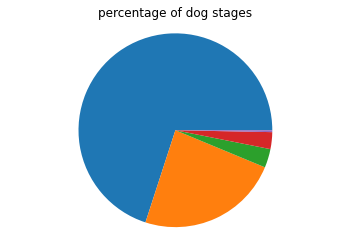

In [67]:
stage_df = clean_t_archive.dog_stage.value_counts()
stage_df
plt.pie(stage_df)
labels=['pupper','doggo','puppo','floofer'],
autopct='%1.1f%%',#show percent on plot 1.1formats(the percent to the tenth place) 
shadow = True
explode=(0.1,0.2,0.3)
plt.title('percentage of dog stages')
plt.axis('equal')#by default matplotlib create chartswith atitle,this line remove this title

insights

1.pupper has the highest percentage

2.doggo, floofer has the lowest percentage

#B.Relationship between Retweet count and favorite count

Text(0, 0.5, 'favorite count')

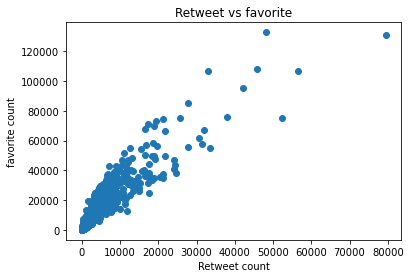

In [80]:
plt.scatter(clean_t_archive.retweet_count,clean_t_archive.favorite_count)
plt.title('Retweet vs favorite')
plt.xlabel('Retweet count')
plt.ylabel('favorite count')

insights
it appears that there is alinear relationship between both parameters.